### Importing packages

In [2]:
import numpy
from timeit import default_timer as timer
import matplotlib.pyplot as plt

### Defining functions

#### Sum of vector

In [3]:
def Sum(list):
    sum=0
    for j in range(len(list)): #calculating the sum of vector elements
            sum+=list[j]
    return sum

#### product of vector

In [4]:
def Product(list):
    product=0
    for j in range(len(list)): #calculating the product of vector elements
            product*=list[j]
    return product

#### Polynomial Direct Calculation

In [5]:
def PolyDirect(poly, n, x):
    # Initializing value
    value = 0 
    for i in range(n):
        value = value + poly[i]* (x**i)
    return value 

#### Horner method to evaluate polynomial

In [6]:
def Horner(poly, n, x):
    # Initializing value
    value = poly[0] 
    for i in range(1, n):
        value = value*x + poly[i]
    return value

#### Bubble Sort

In [55]:
def bubble_sort(list):
    n = len(list) 
    # loop through all list elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # loop through the list from 0 to n-i-1
            # Swap if the element found is greater than the next element
            if list[j] > list[j+1] :
                list[j], list[j+1] = list[j+1], list[j]

#### Timsort

In [8]:
MIN_MERGE = 32
def calcMinRun(n):
    """Returns the minimum length of a run from 23 - 64 so that the len(array)/minrun is less than or equal to a power of 2. 
    e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,..., 127=>64, 128=>32, ...
    """
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r
 
 
# This function sorts array from left index to right index which is of size atmost RUN
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
 
# Merge function merges the sorted runs
def merge(arr, l, m, r):
    # original array is broken in two parts left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])
 
    i, j, k = 0, 0, l
     
    # after comparing, we merge those two array in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
 
        else:
            arr[k] = right[j]
            j += 1
 
        k += 1
 
    # Copy remaining elements of left, if any
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
 
    # Copy remaining element of right, if any
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1
 
 
# Iterative Timsort function to sort the array[0...n-1] (similar to merge sort)
def timSort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
     
    # Sort individual subarrays of size RUN
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
 
    # Start merging from size RUN (or 32). It will merge
    # to form size 64, then 128, 256 and so on ....
    size = minRun
    while size < n:
         
        # Pick starting point of left sub array. We
        # are going to merge arr[left..left+size-1]
        # and arr[left+size, left+2*size-1]
        # After every merge, we increase left by 2*size
        for left in range(0, n, 2 * size):
 
            # Find ending point of left sub array
            # mid+1 is starting point of right sub array
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
 
            # Merge sub array arr[left.....mid] &
            # arr[mid+1....right]
            if mid < right:
                merge(arr, left, mid, right)
 
        size = 2 * size

#### Multiplying two matrixes

In [9]:
def mulMatrix (A,B):
    result=numpy.zeros((len(A), len(B[0])))
    for i in range(len(A)):
        # iterating by column by B
        for j in range(len(B[0])):
            # iterating by rows of B
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

### Measuring the average computer execution time

In [52]:
# Defining some consts.
N=18  #2001
num_processes=9
num_iteration=5
const=5
processes_names=['Const Function','Sum of Vector','Product of Vector', 'Direct Calculation of Polynomial', 'Horner Method Calculation of Polynomial','Bubble Sort','Quick Sort ','TimSort','multiplying matrixes']

In [66]:
# Declaring zeros list for saving the avg time for each algo for each n.
avg_time=numpy.zeros((num_processes, N-1))
# looping from n=1 to n=2000
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    A=numpy.random.random_sample((n,n))
    B=numpy.random.random_sample((n,n))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 1.𝑓(𝒗) = 𝑐𝑜𝑛𝑠𝑡 (constant function)
        first_start = timer()
        result=const;   #const function
        first_end = timer()
        # Saving the time in the suitable array element. After the looping over index, the avg of time will be calculated by dividing by 5.
        c=(first_end - first_start)
        # print(str(n)+'   '+str(index)+'   '+str(c))
        avg_time[0][n-1]+=(first_end - first_start)
        ############# 
        # 2.𝑓(𝒗) = (the sum of elements)
        second_start = timer()
        sum= Sum(v)
        second_end = timer()
        avg_time[1][n-1]+=(second_end - second_start)
        ############# 
        # 3.𝑓(𝒗) = (the product of elements)
        third_start = timer()
        product= Product(v)
        third_end = timer()
        avg_time[2][n-1]+=(third_end - third_start)
        ############# 
        # 4.1 𝑃(1.5) by a direct calculation 
        forth_start = timer()
        result=PolyDirect(v,n,1.5)
        forth_end = timer()
        avg_time[3][n-1]+=(forth_end - forth_start)
        ############# 
        # 4.2 𝑃(1.5) by Horner’s method
        fifth_start = timer()
        result=Horner(v,n,1.5)
        fifth_end = timer()
        avg_time[4][n-1]+=(fifth_end - fifth_start)
        ##############
        # 5. Bubble Sort
        sixth_start = timer()
        bubble_sorted = bubble_sort(v)
        sixth_end = timer()
        avg_time[5][n-1]+=(sixth_end-sixth_start)
        ##############
        # 6. Quick Sort 
        seventh_start = timer()
        quick_sorted = numpy.sort(v, kind='quick sort') #using existing implementation of quick sort in python numpy.
        seventh_end = timer()
        avg_time[6][n-1]+=(seventh_end - seventh_start)
        ##############
        # 7. TimSort
        eighth_start = timer()
        time_sorted = timSort(v)
        eighth_end = timer()
        avg_time[7][n-1]+=(eighth_end - eighth_start)
        ##############
        # 8. multiplying matrixes
        ninth_start = timer() 
        time_sorted = mulMatrix(A,B)
        ninth_end = timer()
        avg_time[8][n-1]+=(ninth_end - ninth_start)
avg_time=avg_time/5 #Dividing the array by 5 to get the average of all times.


In [67]:
print (avg_time)

[[3.99999772e-07 2.00000068e-07 2.00000068e-07 2.20000220e-07
  4.19999924e-07 2.59999797e-07 1.79999734e-07 2.00000250e-07
  3.40000224e-07 1.80000097e-07 3.60000013e-07 3.79999983e-07
  5.00000169e-07 1.27999992e-06 2.20000220e-07 4.60000228e-07
  4.19999924e-07]
 [1.82000003e-06 1.42000008e-06 1.62000033e-06 1.73999997e-06
  2.70000000e-06 2.15999989e-06 2.10000035e-06 2.24000032e-06
  2.93999965e-06 2.66000043e-06 3.44000018e-06 3.21999996e-06
  4.12000009e-06 5.76000002e-06 3.49999973e-06 5.40000037e-06
  4.66000001e-06]
 [1.41999972e-06 1.25999995e-06 1.42000008e-06 1.57999984e-06
  1.95999983e-06 1.96000001e-06 1.92000007e-06 1.99999995e-06
  2.48000033e-06 2.23999978e-06 2.75999992e-06 2.67999967e-06
  3.04000023e-06 3.89999950e-06 2.93999983e-06 4.09999975e-06
  3.72000013e-06]
 [1.72000018e-06 2.28000008e-06 2.64000028e-06 3.06000002e-06
  3.99999972e-06 3.90000005e-06 6.91999994e-06 4.49999989e-06
  5.32000013e-06 5.53999980e-06 6.58000008e-06 6.42000014e-06
  7.49999981e-06

### Plotting average execution time as a function of n

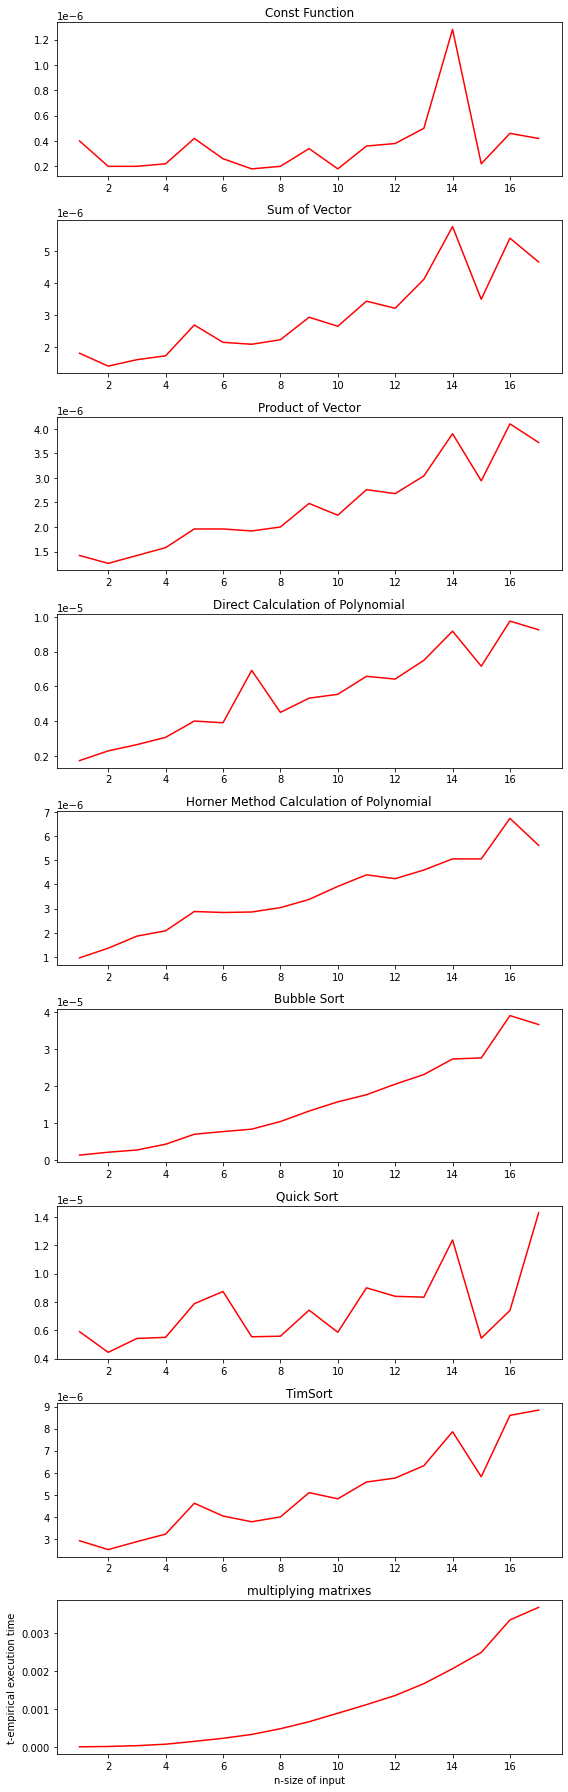

In [69]:
num_rows, num_cols = avg_time.shape
fig, axes = plt.subplots(num_rows,1, figsize=(8,25))
xgrid = x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
for axis,i in zip(axes,range(0,num_processes)):
    axis.plot(xgrid, avg_time[i], 'r-')
    axis.set_title(processes_names[i])
plt.xlabel("n-size of input")
plt.ylabel("t-empirical execution time")
plt.tight_layout()